In [65]:
#Initial imports
import pandas as pd                     #Panda library
import numpy as np                      #Numpy library
import datetime as dt                   #Date time library
from pathlib import Path                #Path library
import plotly.express as px             #Plotly library
import hvplot.pandas                    #HVPlot library
import panel as pn                      #Panel library

from panel.interact import interact     #Import interact
pn.extension("plotly")

%matplotlib inline
import matplotlib.pyplot as plt

In [66]:
# Uploading and Reading CO2 Global Data
co2_global = pd.read_csv("/Users/aliait/Desktop/co2_global_data.csv",index_col='Year', parse_dates=True, usecols=['Year', 'Total CO2'])
co2_global.head(5)

,Total CO2
Year,
1850-01-01,196.896032
1851-01-01,198.804976
1852-01-01,207.550944
1853-01-01,217.209248
1854-01-01,255.138976


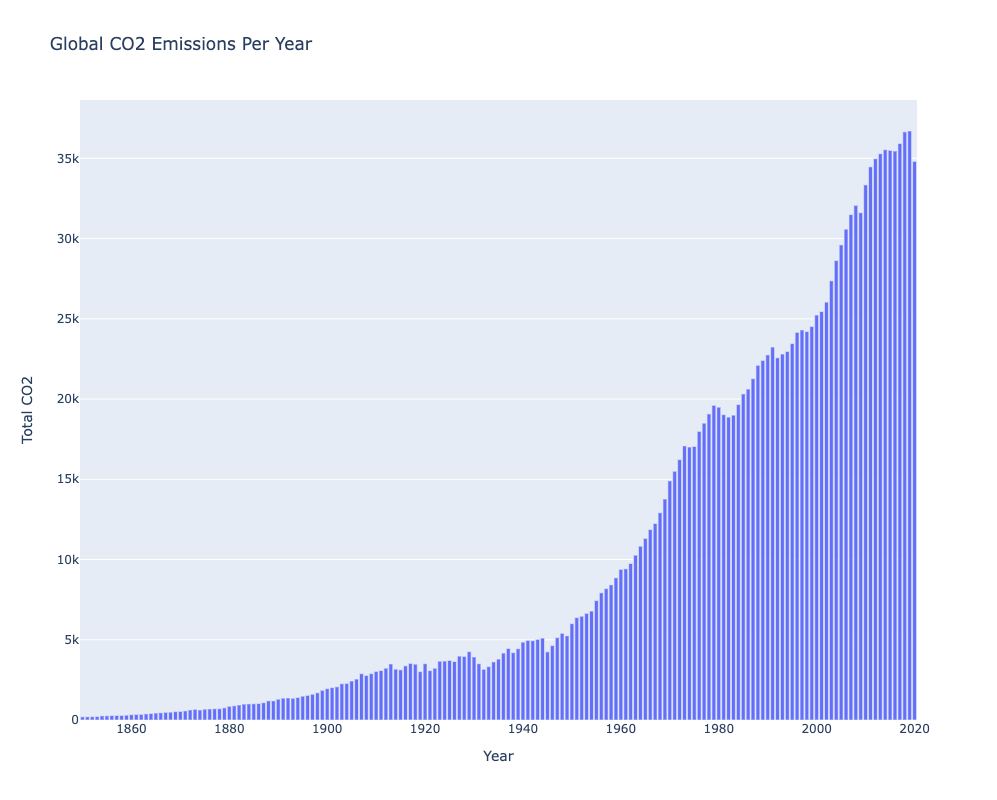

In [67]:
# Creating a plot to show Global CO2 Emission
co2_per_year = co2_global.groupby("Year").sum().reset_index()
co2_plot = px.bar(co2_per_year, x="Year", y="Total CO2", title="Global CO2 Emissions Per Year", width=1000, height=800)
co2_plot

In [68]:
#Getting and Reading Data for Temperature Change
temp_change=pd.read_csv("/Users/aliait/Desktop/Temperature.csv",index_col="Date")
temp_change.head(5)

,Temperature Change
Date,
Jan 80,0.287
Feb 80,0.482
Mar 80,0.131
Apr 80,0.519
May 80,0.518


In [69]:
# Use a rolling window to have a smoother and more readable graph
temp_change=temp_change.rolling(window=90).mean().dropna()
temp_change

,Temperature Change
Date,
Jun 87,0.264211
Jul 87,0.268011
Aug 87,0.264067
Sep 87,0.267956
Oct 87,0.265533
...,...
Aug 20,1.246678
Sep 20,1.252589
Oct 20,1.258411


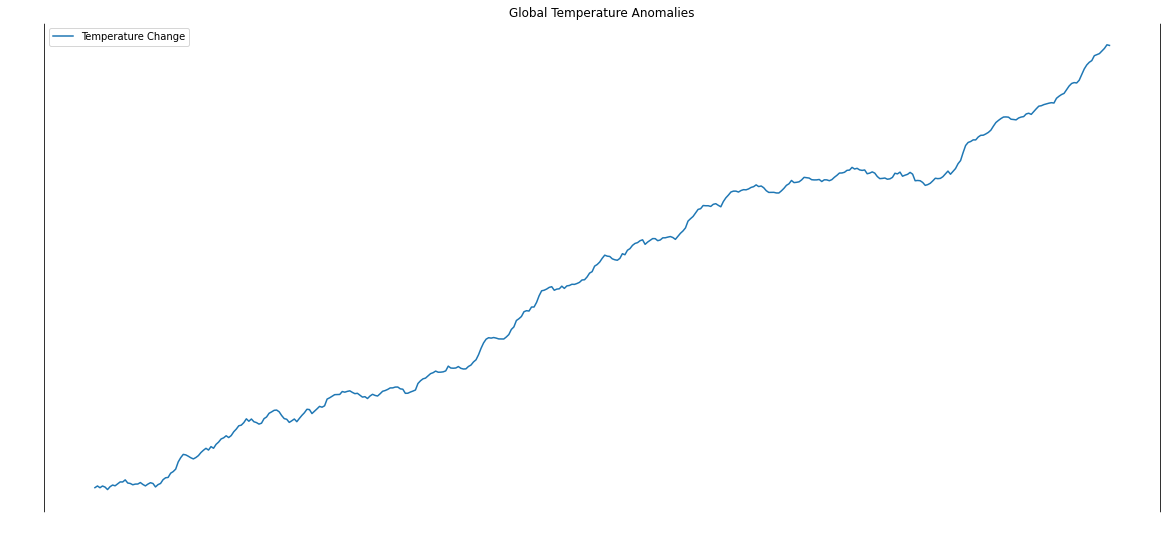

In [70]:
#Plot chart for Temperature Anomalies
temp_change_plot = temp_change.plot(y='Temperature Change', title="Global Temperature Anomalies", figsize=(20, 9), kind="line", ylabel='Temperature Change', xlabel='Years')
temp_change_plot.spines['bottom'].set_color('white')
temp_change_plot.spines['top'].set_color('white')
temp_change_plot.xaxis.label.set_color('white')
temp_change_plot.yaxis.label.set_color('white')
temp_change_plot.tick_params(axis='x', colors='white')
temp_change_plot.tick_params(axis='y', colors='white')
plt.savefig('Temperature Change.png')